
Predicting Fake News using NLP and Machine Learning 

Reperformance using Data set with fake news

https://towardsdatascience.com/predicting-fake-news-using-nlp-and-machine-learning-scikit-learn-glove-keras-lstm-7bbd557c3443


In [3]:
!pip install contractions

     |████████████████████████████████| 287 kB 8.4 MB/s 
     |████████████████████████████████| 106 kB 6.0 MB/s 


In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams
plt.rcParams['figure.figsize'] = [10,10]
import seaborn as sns
sns.set_theme(style="darkgrid")
from wordcloud import WordCloud

import nltk
from nltk import sent_tokenize
''' Required for Google Colab'''
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
''' Required for Google Colab'''
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')
from nltk.tokenize import word_tokenize

import contractions
import re
import itertools
import datetime
import time
from collections import Counter
import string

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
train_df = pd.read_csv('https://raw.githubusercontent.com/smkerr/COVID-fake-news-detection/main/data/Constraint_Train.csv', header=0)
val_df = pd.read_csv('https://raw.githubusercontent.com/smkerr/COVID-fake-news-detection/main/data/Constraint_Val.csv', header=0)

In [30]:
def preprocess_text(x):
  cleaned_text = re.sub(r'[^a-zA-Z\d\s\']+', '', x)
  word_list = []
  for each_word in cleaned_text.split(' '):
    try:
      word_list.append(contractions.fix(each_word).lower())
    except:
      print(x)
  return " ".join(word_list)

In [32]:
text_cols = ['tweet']

In [33]:
%%time
for col in text_cols:
  print("Processing column: {}".format(col))
  train_df[col] = train_df[col].apply(lambda x: preprocess_text(x))
  val_df[col] = val_df[col].apply(lambda x: preprocess_text(x)) 

Processing column: tweet
CPU times: user 840 ms, sys: 693 µs, total: 841 ms
Wall time: 845 ms


In [34]:
%%time
for col in text_cols:
  print("Processing column: {}".format(col))
  train_df[col] = train_df[col].apply(word_tokenize)
  val_df[col] = val_df[col].apply(word_tokenize)

Processing column: tweet
CPU times: user 1.58 s, sys: 9.59 ms, total: 1.59 s
Wall time: 1.59 s


In [35]:
%%time
for col in text_cols:
  print("Processing column: {}".format(col))
  train_df[col] = train_df[col].apply(lambda x: [each_word for each_word in x if each_word not in stopwords])
  val_df[col] = val_df[col].apply(lambda x: [each_word for each_word in x if each_word not in stopwords])

Processing column: tweet
CPU times: user 568 ms, sys: 0 ns, total: 568 ms
Wall time: 574 ms


In [36]:
train_df.head() 

,id,tweet,label
0,1,"[cdc, currently, reports, 99031, deaths, gener...",real
1,2,"[states, reported, 1121, deaths, small, rise, ...",real
2,3,"[politically, correct, woman, almost, uses, pa...",fake
3,4,"[indiafightscorona, 1524, covid, testing, labo...",real
4,5,"[populous, states, generate, large, case, coun...",real


## Tf-idf and Count Vectorizer

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams
plt.rcParams['figure.figsize'] = [10,10]
import seaborn as sns
sns.set_theme(style="darkgrid")

import nltk
from nltk import sent_tokenize
''' Required for Google Colab'''
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('stopwords')
''' Required for Google Colab'''
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')
from nltk.tokenize import word_tokenize
import contractions

import string
import joblib
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_df['tweet_joined'] = train_df['tweet'].apply(lambda x: " ".join(x))
val_df['tweet_joined'] = val_df['tweet'].apply(lambda x: " ".join(x))

In [ ]:
target = train_df['label'].values

In [ ]:
count_vectorizer = CountVectorizer(ngram_range=(1, 2))
tf_idf_transformer = TfidfTransformer(smooth_idf=False)

# fit and transform train data to count vectorizer
count_vectorizer.fit(train_df['tweet_joined'].values)
count_vect_train = count_vectorizer.transform(train_df['tweet_joined'].values)

# fit the counts vector to tfidf transformer
tf_idf_transformer.fit(count_vect_train)
tf_idf_train = tf_idf_transformer.transform(count_vect_train)

# Transform the test data as well
count_vect_test = count_vectorizer.transform(val_df['tweet_joined'].values)
tf_idf_test = tf_idf_transformer.transform(count_vect_test)

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(tf_idf_train, target, random_state=0)

In [ ]:
tf_idf_transformer.transform(count_vect_train)

<6420x91208 sparse matrix of type '<class 'numpy.float64'>'
	with 204109 stored elements in Compressed Sparse Row format>

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4815, 91208)
(1605, 91208)
(4815,)
(1605,)


In [ ]:
df_perf_metrics = pd.DataFrame(columns=['Model', 'Accuracy_Training_Set', 'Accuracy_Test_Set', 'Precision', 'Recall', 'f1_score'])

In [ ]:
df_perf_metrics = pd.DataFrame(columns=[
    'Model', 'Accuracy_Training_Set', 'Accuracy_Test_Set', 'Precision',
    'Recall', 'f1_score', 'Training Time (secs'
])

In [ ]:
models_trained_list = []

In [ ]:
def get_perf_metrics(model, i):
    # model name
    model_name = type(model).__name__
    # time keeping
    start_time = time.time()
    print("Training {} model...".format(model_name))
    # Fitting of model
    model.fit(X_train, y_train)
    print("Completed {} model training.".format(model_name))
    elapsed_time = time.time() - start_time
    # Time Elapsed
    print("Time elapsed: {:.2f} s.".format(elapsed_time))
    # Predictions
    y_pred = model.predict(X_test)
    # Add to ith row of dataframe - metrics
    df_perf_metrics.loc[i] = [
        model_name,
        model.score(X_train, y_train),
        model.score(X_test, y_test),
        precision_score(y_test, y_pred, pos_label="real"),
        recall_score(y_test, y_pred, pos_label="real"),
        f1_score(y_test, y_pred, pos_label="real"), "{:.2f}".format(elapsed_time)
    ]
    # keep a track of trained models
    models_trained_list.append(model)
    print("Completed {} model's performance assessment.".format(model_name))

In [ ]:
models_list = [LogisticRegression(),
               MultinomialNB(),
               RandomForestClassifier(),
               DecisionTreeClassifier(),
               GradientBoostingClassifier(),
               AdaBoostClassifier(),
               LinearSVC()]

In [ ]:
%%time
for n, model in enumerate(models_list):
    get_perf_metrics(model, n)

Training LogisticRegression model...
Completed LogisticRegression model training.
Time elapsed: 1.68 s.
Completed LogisticRegression model's performance assessment.
Training MultinomialNB model...
Completed MultinomialNB model training.
Time elapsed: 0.03 s.
Completed MultinomialNB model's performance assessment.
Training RandomForestClassifier model...
Completed RandomForestClassifier model training.
Time elapsed: 19.06 s.
Completed RandomForestClassifier model's performance assessment.
Training DecisionTreeClassifier model...
Completed DecisionTreeClassifier model training.
Time elapsed: 2.37 s.
Completed DecisionTreeClassifier model's performance assessment.
Training GradientBoostingClassifier model...
Completed GradientBoostingClassifier model training.
Time elapsed: 43.72 s.
Completed GradientBoostingClassifier model's performance assessment.
Training AdaBoostClassifier model...
Completed AdaBoostClassifier model training.
Time elapsed: 19.26 s.
Completed AdaBoostClassifier model'

In [ ]:
df_perf_metrics

,Model,Accuracy_Training_Set,Accuracy_Test_Set,Precision,Recall,f1_score,Training Time (secs
0,LogisticRegression,0.979855,0.895950,0.917293,0.878752,0.897609,1.68
1,MultinomialNB,0.990862,0.891589,0.859324,0.945978,0.900571,0.03
2,RandomForestClassifier,1.000000,0.892835,0.962238,0.825930,0.888889,19.06
3,DecisionTreeClassifier,1.000000,0.842368,0.850242,0.845138,0.847682,2.37
4,GradientBoostingClassifier,0.900312,0.859813,0.892765,0.829532,0.859988,43.72
5,AdaBoostClassifier,0.867913,0.839875,0.869231,0.813926,0.840670,19.26
6,LinearSVC,1.000000,0.915265,0.937265,0.896759,0.916564,0.04


## based on validation data

In [ ]:
train_df = pd.read_csv('https://raw.githubusercontent.com/smkerr/COVID-fake-news-detection/main/data/Constraint_Train.csv', header=0)
val_df = pd.read_csv('https://raw.githubusercontent.com/smkerr/COVID-fake-news-detection/main/data/Constraint_Val.csv', header=0)

In [40]:
stopwords = nltk.corpus.stopwords.words('english')

def cleantext(string):
    text = string.lower().split()
    text = " ".join(text)
    text = re.sub(r"http(\S)+",' ',text)    
    text = re.sub(r"www(\S)+",' ',text)
    text = re.sub(r"&",' and ',text)  
    tx = text.replace('&amp',' ')
    text = re.sub(r"[^a-zA-Z]+",' ',text)
    text = text.split()
    text = [w for w in text if not w in stopwords]
    text = " ".join(text)
    return text

In [41]:
train_df['tweet'] = train_df['tweet'].map(lambda x: cleantext(x))
val_df['tweet'] = val_df['tweet'].map(lambda x: cleantext(x))

In [ ]:
count_vectorizer = CountVectorizer(ngram_range=(1, 2))
tf_idf_transformer = TfidfTransformer(smooth_idf=False)

# fit and transform train data to count vectorizer
count_vectorizer.fit(train_df['tweet'].values)
count_vect_train = count_vectorizer.transform(train_df['tweet'].values)

# fit the counts vector to tfidf transformer
tf_idf_transformer.fit(count_vect_train)
tf_idf_train = tf_idf_transformer.transform(count_vect_train)

# Transform the test data as well
count_vect_test = count_vectorizer.transform(val_df['tweet'].values)
tf_idf_test = tf_idf_transformer.transform(count_vect_test)

In [1]:
count_vect_train

NameError: ignored

In [ ]:
def get_perf_metrics(model, i):
    # model name
    model_name = type(model).__name__
    # time keeping
    start_time = time.time()
    print("Training {} model...".format(model_name))
    # Fitting of model
    model.fit(tf_idf_train, train_df["label"])
    print("Completed {} model training.".format(model_name))
    elapsed_time = time.time() - start_time
    # Time Elapsed
    print("Time elapsed: {:.2f} s.".format(elapsed_time))
    # Predictions
    y_pred = model.predict(tf_idf_test)
    # Add to ith row of dataframe - metrics
    df_perf_metrics.loc[i] = [
        model_name,
        model.score(tf_idf_train, train_df["label"]),
        model.score(tf_idf_test, val_df["label"]),
        precision_score(val_df["label"], y_pred, pos_label="real"),
        recall_score(val_df["label"], y_pred, pos_label="real"),
        f1_score(val_df["label"], y_pred, pos_label="real"), "{:.2f}".format(elapsed_time)
    ]
    # keep a track of trained models
    models_trained_list.append(model)
    print("Completed {} model's performance assessment.".format(model_name))

In [ ]:
%%time
for n, model in enumerate(models_list):
    get_perf_metrics(model, n)

Training LogisticRegression model...
Completed LogisticRegression model training.
Time elapsed: 0.61 s.
Completed LogisticRegression model's performance assessment.
Training MultinomialNB model...
Completed MultinomialNB model training.
Time elapsed: 0.02 s.
Completed MultinomialNB model's performance assessment.
Training RandomForestClassifier model...
Completed RandomForestClassifier model training.
Time elapsed: 7.89 s.
Completed RandomForestClassifier model's performance assessment.
Training DecisionTreeClassifier model...
Completed DecisionTreeClassifier model training.
Time elapsed: 2.63 s.
Completed DecisionTreeClassifier model's performance assessment.
Training GradientBoostingClassifier model...
Completed GradientBoostingClassifier model training.
Time elapsed: 8.95 s.
Completed GradientBoostingClassifier model's performance assessment.
Training AdaBoostClassifier model...
Completed AdaBoostClassifier model training.
Time elapsed: 2.30 s.
Completed AdaBoostClassifier model's p

## result

tweets incl. numbers:

In [ ]:
df_perf_metrics

,Model,Accuracy_Training_Set,Accuracy_Test_Set,Precision,Recall,f1_score,Training Time (secs
0,LogisticRegression,0.973209,0.917290,0.929026,0.911607,0.920234,0.90
1,MultinomialNB,0.987539,0.918224,0.886345,0.967857,0.925309,0.02
2,RandomForestClassifier,1.000000,0.906075,0.950932,0.865179,0.906031,8.17
3,DecisionTreeClassifier,1.000000,0.837383,0.840989,0.850000,0.845471,2.37
4,GradientBoostingClassifier,0.902025,0.869626,0.917577,0.825000,0.868829,10.06
5,AdaBoostClassifier,0.876480,0.866822,0.888372,0.852679,0.870159,2.46
6,LinearSVC,1.000000,0.938785,0.942704,0.940179,0.941439,0.06


tweets excl. numbers:

In [ ]:
df_perf_metrics

,Model,Accuracy_Training_Set,Accuracy_Test_Set,Precision,Recall,f1_score,Training Time (secs
0,LogisticRegression,0.973209,0.918224,0.920748,0.923214,0.921979,0.61
1,MultinomialNB,0.985514,0.907477,0.869391,0.968750,0.916385,0.02
2,RandomForestClassifier,1.000000,0.905607,0.939655,0.875893,0.906654,7.89
3,DecisionTreeClassifier,1.000000,0.837850,0.835212,0.859821,0.847338,2.63
4,GradientBoostingClassifier,0.893146,0.858411,0.904055,0.816071,0.857813,8.95
5,AdaBoostClassifier,0.865888,0.848598,0.861162,0.847321,0.854185,2.30
6,LinearSVC,1.000000,0.937383,0.931699,0.950000,0.940760,0.04


ValueError: ignored

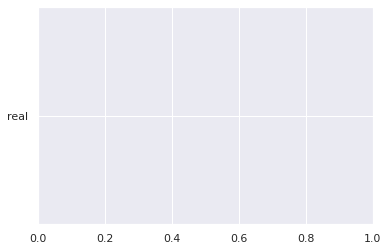

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(tf_idf_train, train_df["label"], s=14)
